**Половников Никита**

### Реализация оптимизаторов Momentum, RMSprop и Adam.

In [100]:
class MomentumOptimizer:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.h = None

    def update(self, params, gradients):
        if self.h is None:
            self.h = np.zeros_like(params)
        self.h = self.momentum * self.h + (1 - self.momentum) * gradients
        params -= self.learning_rate * self.h

        
class RMSpropOptimizer:
    def __init__(self, learning_rate=0.01, beta=0.9, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta = beta
        self.epsilon = epsilon
        self.G = None

    def update(self, params, gradients):
        if self.G is None:
            self.G = np.zeros_like(params)
        self.G = self.beta * self.G + (1 - self.beta) * gradients**2
        params -= self.learning_rate * gradients / (np.sqrt(self.G) + self.epsilon)


class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.moment1 = None
        self.moment2 = None
        self.epoch = 0

    def update(self, weights, gradients):
        self.epoch += 1
        if self.moment1 is None:
            self.moment1 = np.zeros_like(weights)
            self.moment2 = np.zeros_like(weights)
        self.moment1 = self.beta1 * self.moment1 + (1 - self.beta1) * gradients
        self.moment2 = self.beta2 * self.moment2 + (1 - self.beta2) * (gradients**2)
        moment1_corr = self.moment1 / (1 - self.beta1**self.epoch)
        moment2_corr = self.moment2 / (1 - self.beta2**self.epoch)
        weights -= self.learning_rate * moment1_corr / (np.sqrt(moment2_corr) + self.epsilon)


### Сравнение точности моделей, при изменении learning_rate

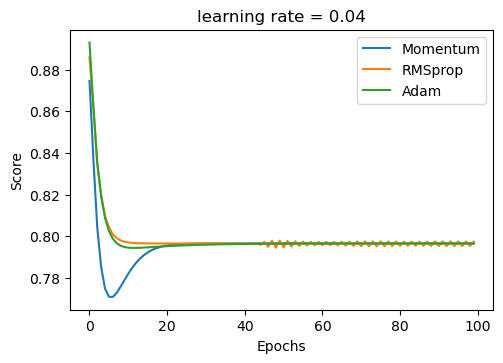

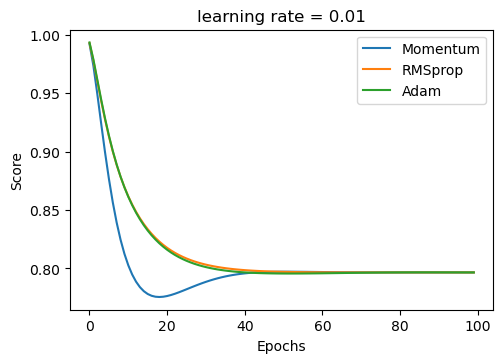

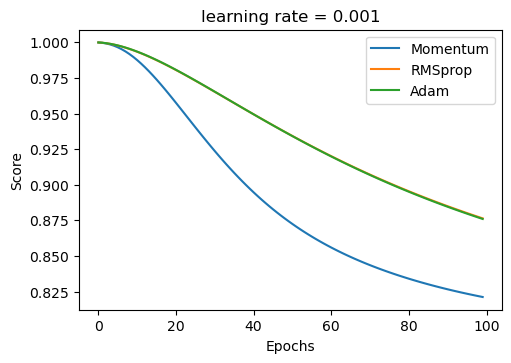

In [204]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=10, n_features= 100, noise=0.1, random_state=42)

model = LinearRegression()

for i in [0.04, 0.01, 0.001]:
    optimizers = {
        'Momentum': MomentumOptimizer(learning_rate=i, momentum=0.9),
        'RMSprop': RMSpropOptimizer(learning_rate=i, beta=0.9),
        'Adam': AdamOptimizer(learning_rate=i, beta1=0.9, beta2=0.9)
        }

    losses = {name: [] for name in optimizers}
    scores = {name: [] for name in optimizers}

    for name, optimizer in optimizers.items():
        model.fit(X, y)
        params = model.coef_
        for _ in range(100):
            gradients = -2 * X.T.dot(y - X.dot(params)) / len(X)
            optimizer.update(params, gradients)
            params -= optimizer.learning_rate * gradients
            score = model.score(X, y)
            scores[name].append(score)

    plt.figure(figsize=(12, 8))
    j = 1
    for name, scores_history in scores.items():
        plt.subplot(2,2,j)
        plt.plot(scores_history, label=name)
    j += 1
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.title(f'learning rate = {i}')
    plt.legend()
    plt.show()


### Сравнение точности моделей, при изменении n_samples

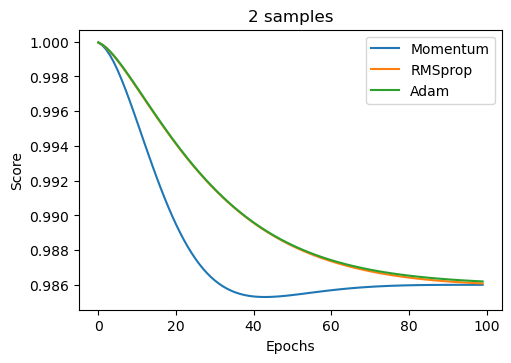

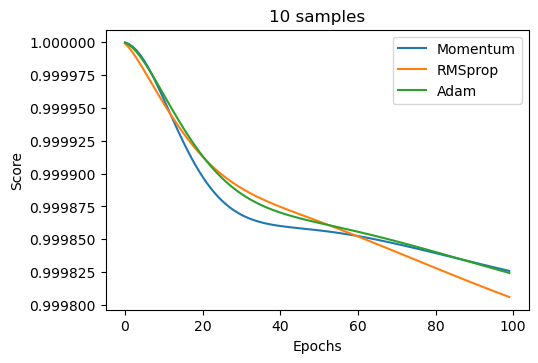

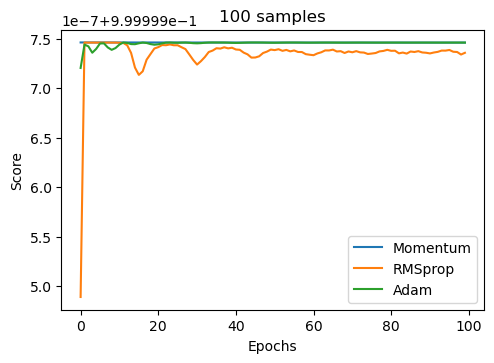

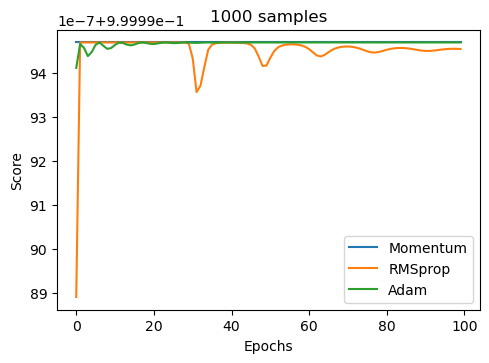

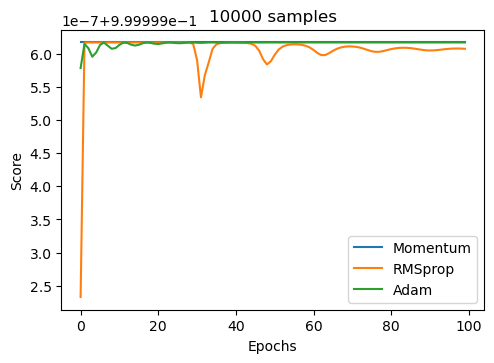

In [206]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

for i in [2, 10, 100, 1000, 10000]:
    X, y = make_regression(n_samples=i, n_features= 10, noise=0.1, random_state=42)

    model = LinearRegression()

    optimizers = {
        'Momentum': MomentumOptimizer(learning_rate=0.01, momentum=0.9),
        'RMSprop': RMSpropOptimizer(learning_rate=0.01, beta=0.9),
        'Adam': AdamOptimizer(learning_rate=0.01, beta1=0.9, beta2=0.999)
    }

    losses = {name: [] for name in optimizers}
    scores = {name: [] for name in optimizers}

    for name, optimizer in optimizers.items():
        model.fit(X, y)
        params = model.coef_
        for _ in range(100):
            gradients = -2 * X.T.dot(y - X.dot(params)) / len(X)
            optimizer.update(params, gradients)
            params -= optimizer.learning_rate * gradients
            score = model.score(X, y)
            scores[name].append(score)

    plt.figure(figsize=(12, 8))
    j = 1
    
    for name, scores_history in scores.items():
        plt.subplot(2,2,j)
        plt.plot(scores_history, label=name)
        
    j += 1
    
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.title(f'{i} samples')
    plt.legend()
    plt.show()


### Сравнение точности моделей, при изменении n_features

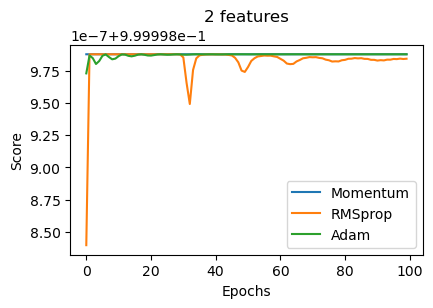

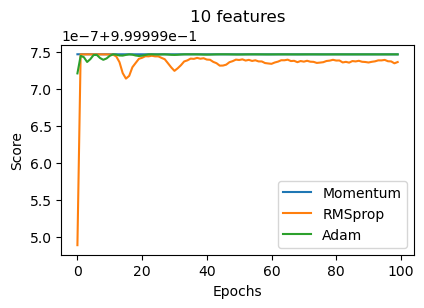

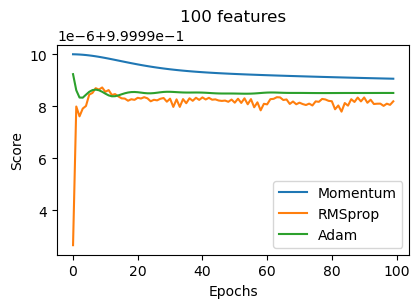

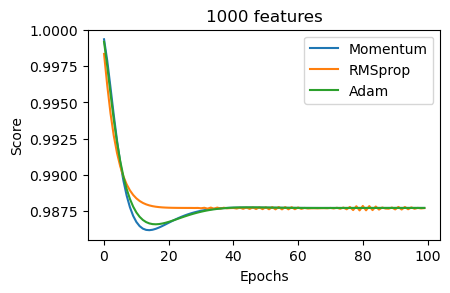

In [190]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Генерация синтетических данных
for i in [2, 10, 100, 1000]:
    X, y = make_regression(n_samples=100, n_features= i, noise=0.1, random_state=42)

# Инициализация модели линейной регрессии
    model = LinearRegression()


# Определение методов оптимизации
    optimizers = {
        'Momentum': MomentumOptimizer(learning_rate=0.01, momentum=0.9),
        'RMSprop': RMSpropOptimizer(learning_rate=0.01, beta=0.9),
        'Adam': AdamOptimizer(learning_rate=0.01, beta1=0.9, beta2=0.999)
    }

# Обучение модели с использованием каждого метода оптимизации
    losses = {name: [] for name in optimizers}
    scores = {name: [] for name in optimizers}

    for name, optimizer in optimizers.items():
        model.fit(X, y)
        params = model.coef_
        for _ in range(100):
            gradients = -2 * X.T.dot(y - X.dot(params)) / len(X)
            optimizer.update(params, gradients)
            params -= optimizer.learning_rate * gradients
            score = model.score(X, y)
            scores[name].append(score)

# Визуализация результатов
    plt.figure(figsize=(10, 6))
    j = 1
    for name, scores_history in scores.items():
        plt.subplot(2,2,j)
        plt.plot(scores_history, label=name)
    j += 1
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.title(f'{i} features')
    plt.legend()
    plt.show()


### Пример того, как лосс ведет себя при изменении learning_rate "по рассписанию"

**Momentum**

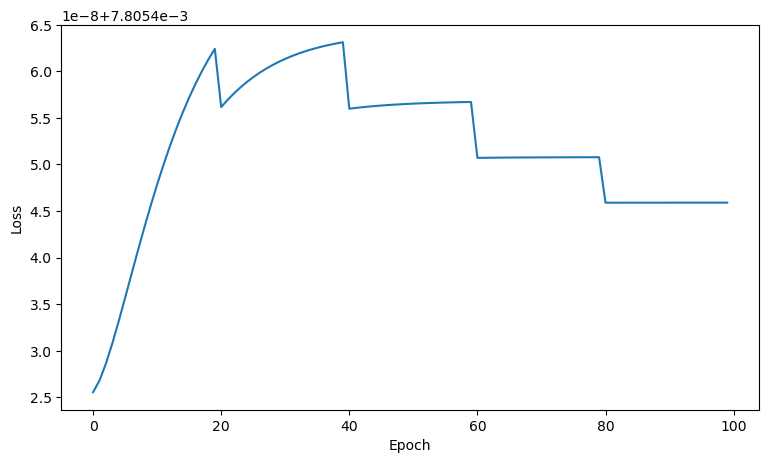

In [174]:
learning_rate = 0.1
decay_rate = 0.9
epochs = 100
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
model = LinearRegression()
optimizer = MomentumOptimizer(learning_rate=learning_rate)
loss_history = []

for epoch in range(epochs):
    model.fit(X, y)
    gradients = -2 * X.T.dot(y - X.dot(model.coef_)) / len(X)
    optimizer.update(model.coef_, gradients)
    loss = np.mean((model.predict(X) - y)**2)
    loss_history.append(loss)
    if (epoch + 1) % 20 == 0:
        optimizer.learning_rate *= decay_rate

plt.figure(figsize=(9, 5))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**RMSprop**

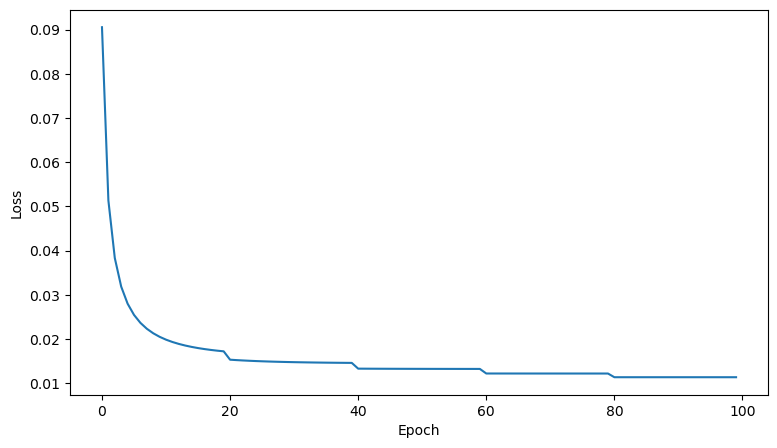

In [176]:
learning_rate = 0.1
decay_rate = 0.9
epochs = 100
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
model = LinearRegression()
optimizer = RMSpropOptimizer(learning_rate=learning_rate, beta=decay_rate)
loss_history = []

for epoch in range(epochs):
    model.fit(X, y)
    gradients = -2 * X.T.dot(y - X.dot(model.coef_)) / len(X)
    optimizer.update(model.coef_, gradients)
    loss = np.mean((model.predict(X) - y)**2)
    loss_history.append(loss)
    if (epoch + 1) % 20 == 0:
        optimizer.learning_rate *= decay_rate

plt.figure(figsize=(9, 5))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**Adam**

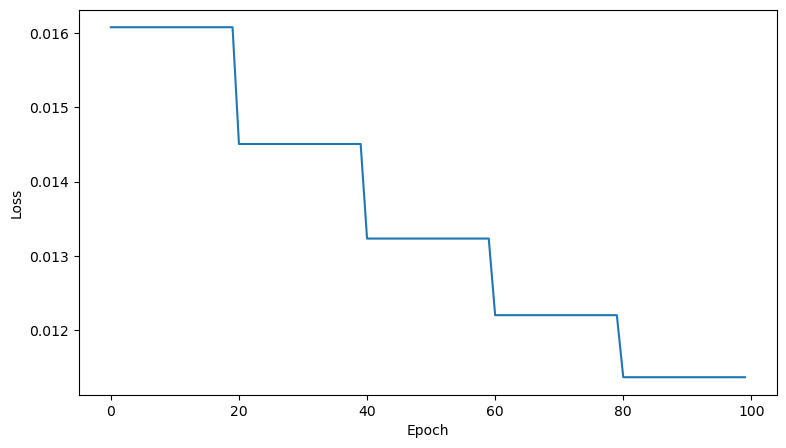

In [175]:
learning_rate = 0.1
decay_rate = 0.9
epochs = 100
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
model = LinearRegression()
optimizer = AdamOptimizer(learning_rate=learning_rate)
loss_history = []

for epoch in range(epochs):
    model.fit(X, y)
    gradients = -2 * X.T.dot(y - X.dot(model.coef_)) / len(X)
    optimizer.update(model.coef_, gradients)
    loss = np.mean((model.predict(X) - y)**2)
    loss_history.append(loss)
    if (epoch + 1) % 20 == 0:
        optimizer.learning_rate *= decay_rate

plt.figure(figsize=(9, 5))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Вывод:
###  В среднем оптимизатор Adam показал лучшую скорость и точность сходимости. Довольно близкий к нему результат имеет оптимизатор RMSprop, но он проигрывает при большом количесве элементов в выборке, что заметно в сравнение точности моделей, при изменении n_samples. При увеличении количества фичей быстрее всего сошелся RMSprop, Adam и Momentum показали похожий результат.